In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.impute import KNNImputer

In [39]:
df = pd.read_excel('diabetes.xlsx', header=0, sheet_name="data")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   n_pregnant                   767 non-null    int64  
 1   gtt                          767 non-null    int64  
 2   blood_pressure               767 non-null    int64  
 3   triceps_skin_fold_thickness  767 non-null    int64  
 4   insulin                      767 non-null    int64  
 5   bmi                          767 non-null    float64
 6   dpf                          767 non-null    float64
 7   age                          767 non-null    int64  
 8   class                        767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.isna().sum()

n_pregnant                     0
gtt                            0
blood_pressure                 0
triceps_skin_fold_thickness    0
insulin                        0
bmi                            0
dpf                            0
age                            0
class                          0
dtype: int64

In [42]:
df

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df["bmi_interpretation"] = 0
for i in range(len(df)):
    bmi = df["bmi"][i]
    if bmi >= 30:
        df["bmi_interpretation"][i] = "obese"
    if bmi >= 18.5 and bmi < 25:
        df["bmi_interpretation"][i] = "normal"
    elif bmi >= 25 and bmi < 30:
        df["bmi_interpretation"][i] = "overweight"
    elif bmi < 18.5:
        df["bmi_interpretation"][i] = "underweight"

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/862353249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi_interpretation"][i] = "overweight"
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df["gtt_interpretation"] = 0
for i in range(len(df)):
    gtt = df["gtt"][i]
    if gtt < 7.8:
        df["gtt_interpretation"][i] = "normal"
    elif gtt > 7.8 and gtt <= 11:
        df["gtt_interpretation"][i] = "abnormal"
    elif gtt > 11:
        df["gtt_interpretation"][i] = "diabetes mellitus"

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/3540710434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gtt_interpretation"][i] = "diabetes mellitus"


Diskrete Merkmale:
    -age
    -class
    -number of pregnancies
    -gtt
    -insulin


Stetige Merkmale:
    -dpf
    -bmi

Skala
Nominalskala:
    -class

Ordinalskala:

Intervallskala:
    -

Verhältnisskala:
    -age
    -number of pregnancies
    -insulin
    -gtt

In [46]:
def overview(df, col):
    f, axs = plt.subplots(1,2, figsize=(9,6), gridspec_kw=dict(width_ratios=[15,10]))
    sns.boxplot(df[col], ax=axs[0])
    sns.distplot(df[col], ax=axs[1])
    return plt.show()

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


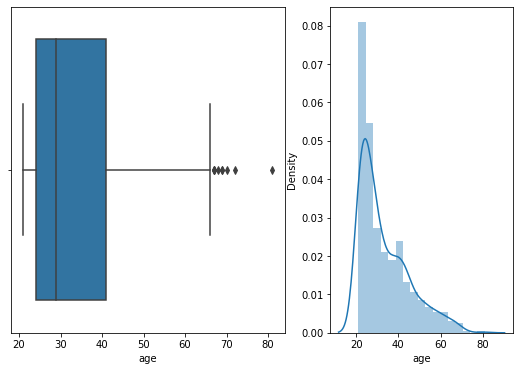

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


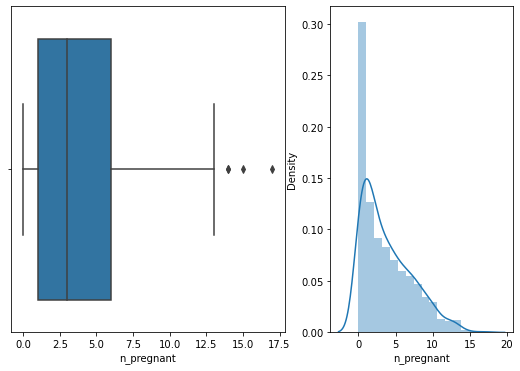

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


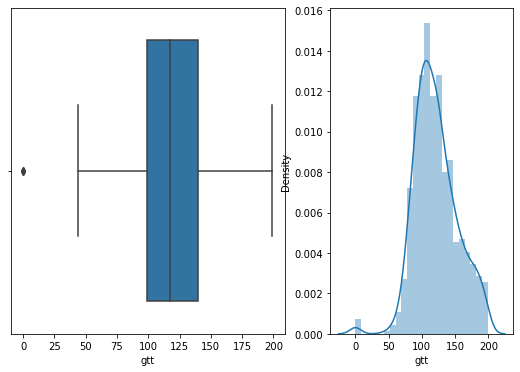

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


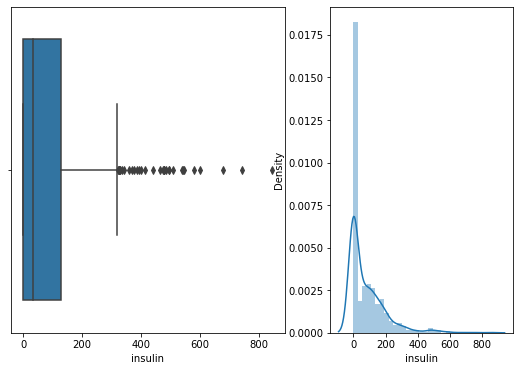

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


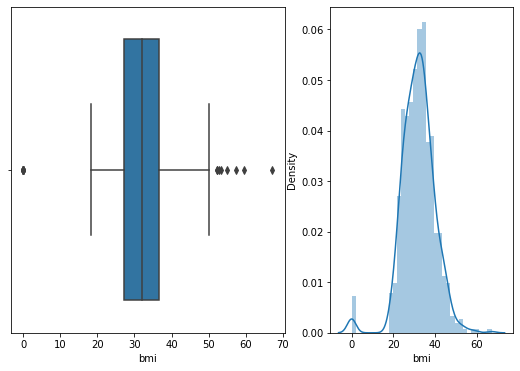

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


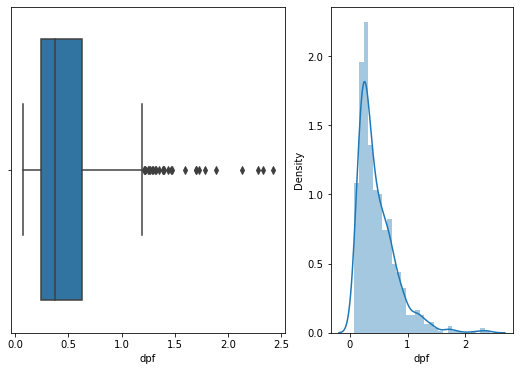

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


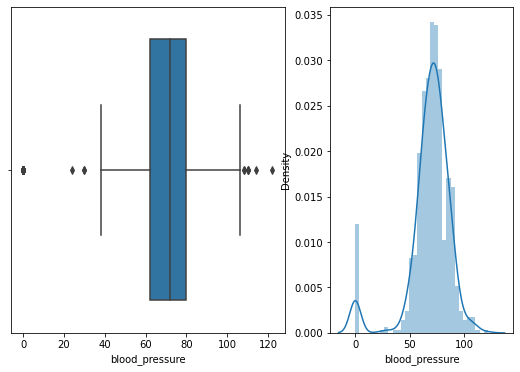

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


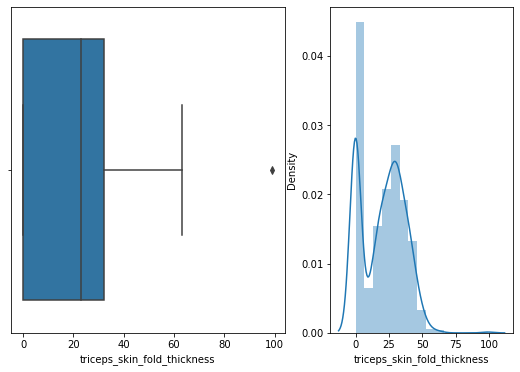

In [47]:
overview(df, "age")
overview(df, "n_pregnant")
overview(df, "gtt")
overview(df, "insulin")
overview(df, "bmi")
overview(df, "dpf")
overview(df, "blood_pressure")
overview(df, "triceps_skin_fold_thickness")

In [48]:
df_clean = df.copy()

In [49]:
for i in range(len(df_clean)):
    if df_clean["bmi"][i] == 0:
        df_clean["bmi"][i] = np.nan
    if df_clean["gtt"][i] == 0:
        df_clean["gtt"][i] = np.nan
    if df_clean["blood_pressure"][i] == 0:
        df_clean["blood_pressure"][i] = np.nan
    if df_clean["triceps_skin_fold_thickness"][i] == 0:
        df_clean["triceps_skin_fold_thickness"][i] = np.nan
    if df_clean["insulin"][i] == 0:
        df_clean["insulin"][i] = np.nan

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1056221398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["insulin"][i] = np.nan
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1056221398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [50]:
df_clean.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,762.000000,732.000000,540.000000,394.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.390616,10.483667,118.775855,6.929448,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,36.000000,190.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
def count_na_absolt_relativ(df: pd.DataFrame):
    """Counts the number of missing values in a dataframe and returns a new DataFrame with the absolut and relativ value."""
    df_absolut_relativ = pd.DataFrame(columns=["absolut", "relativ"])
    df_absolut_relativ["absolut"] = df.isna().sum()
    df_absolut_relativ["relativ"] = df_absolut_relativ["absolut"] / len(df)
    return df_absolut_relativ

In [52]:
count_na_absolt_relativ(df_clean)

,absolut,relativ
n_pregnant,0,0.000000
gtt,5,0.006519
blood_pressure,35,0.045632
triceps_skin_fold_thickness,227,0.295958
insulin,373,0.486310
bmi,11,0.014342
dpf,0,0.000000
age,0,0.000000
class,0,0.000000
bmi_interpretation,0,0.000000


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


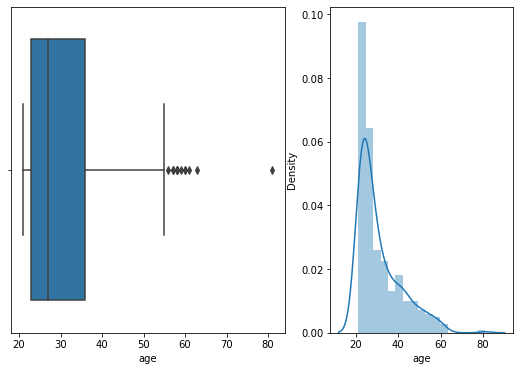

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


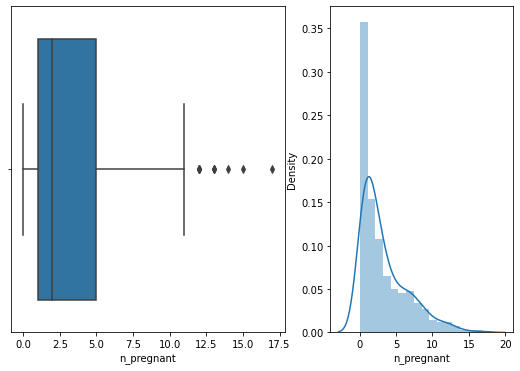

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


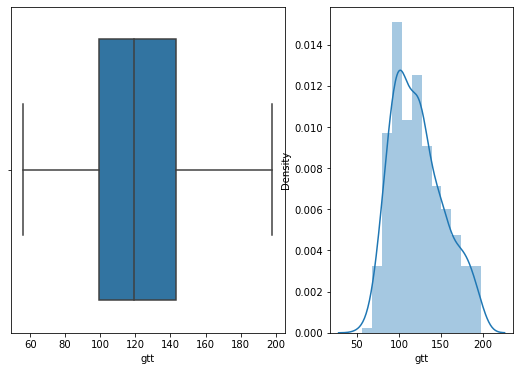

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


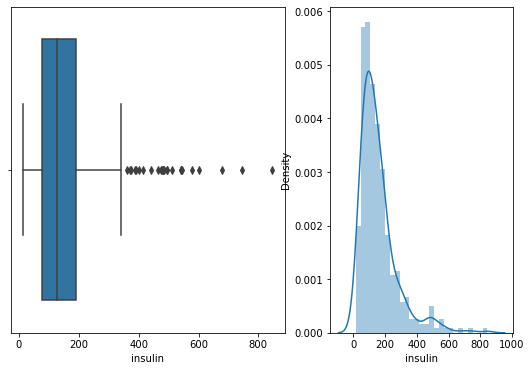

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


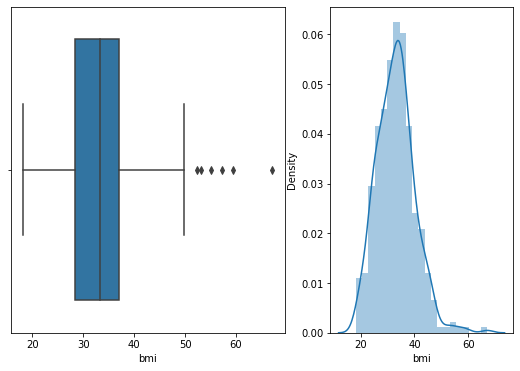

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


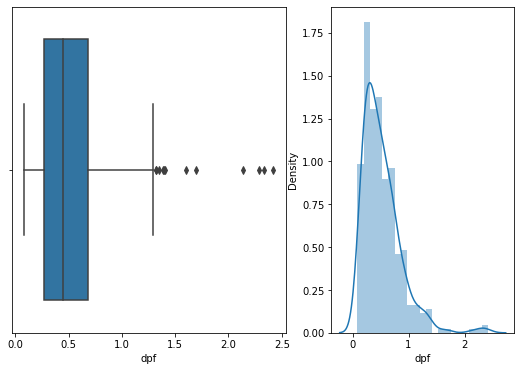

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


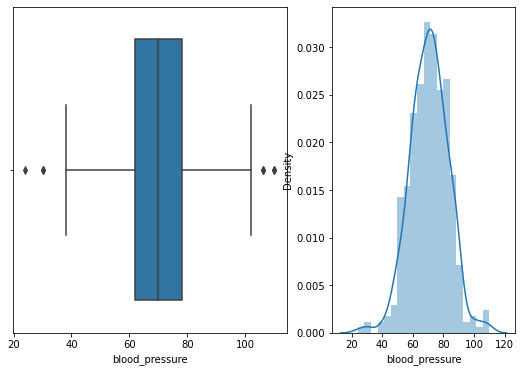

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


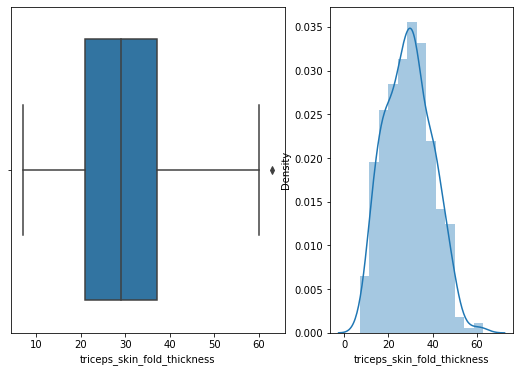

In [53]:
overview(df_clean.dropna(), "age")
overview(df_clean.dropna(), "n_pregnant")
overview(df_clean.dropna(), "gtt")
overview(df_clean.dropna(), "insulin")
overview(df_clean.dropna(), "bmi")
overview(df_clean.dropna(), "dpf")
overview(df_clean.dropna(), "blood_pressure")
overview(df_clean.dropna(), "triceps_skin_fold_thickness")

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


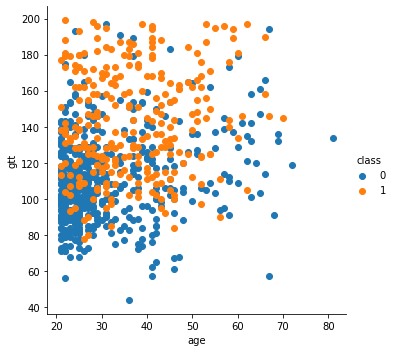

In [54]:
#Correlation plot and calculate correlation coefficient
sns.FacetGrid(df_clean, hue="class", size=5) \
    .map(plt.scatter, "age", "gtt") \
    .add_legend()

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


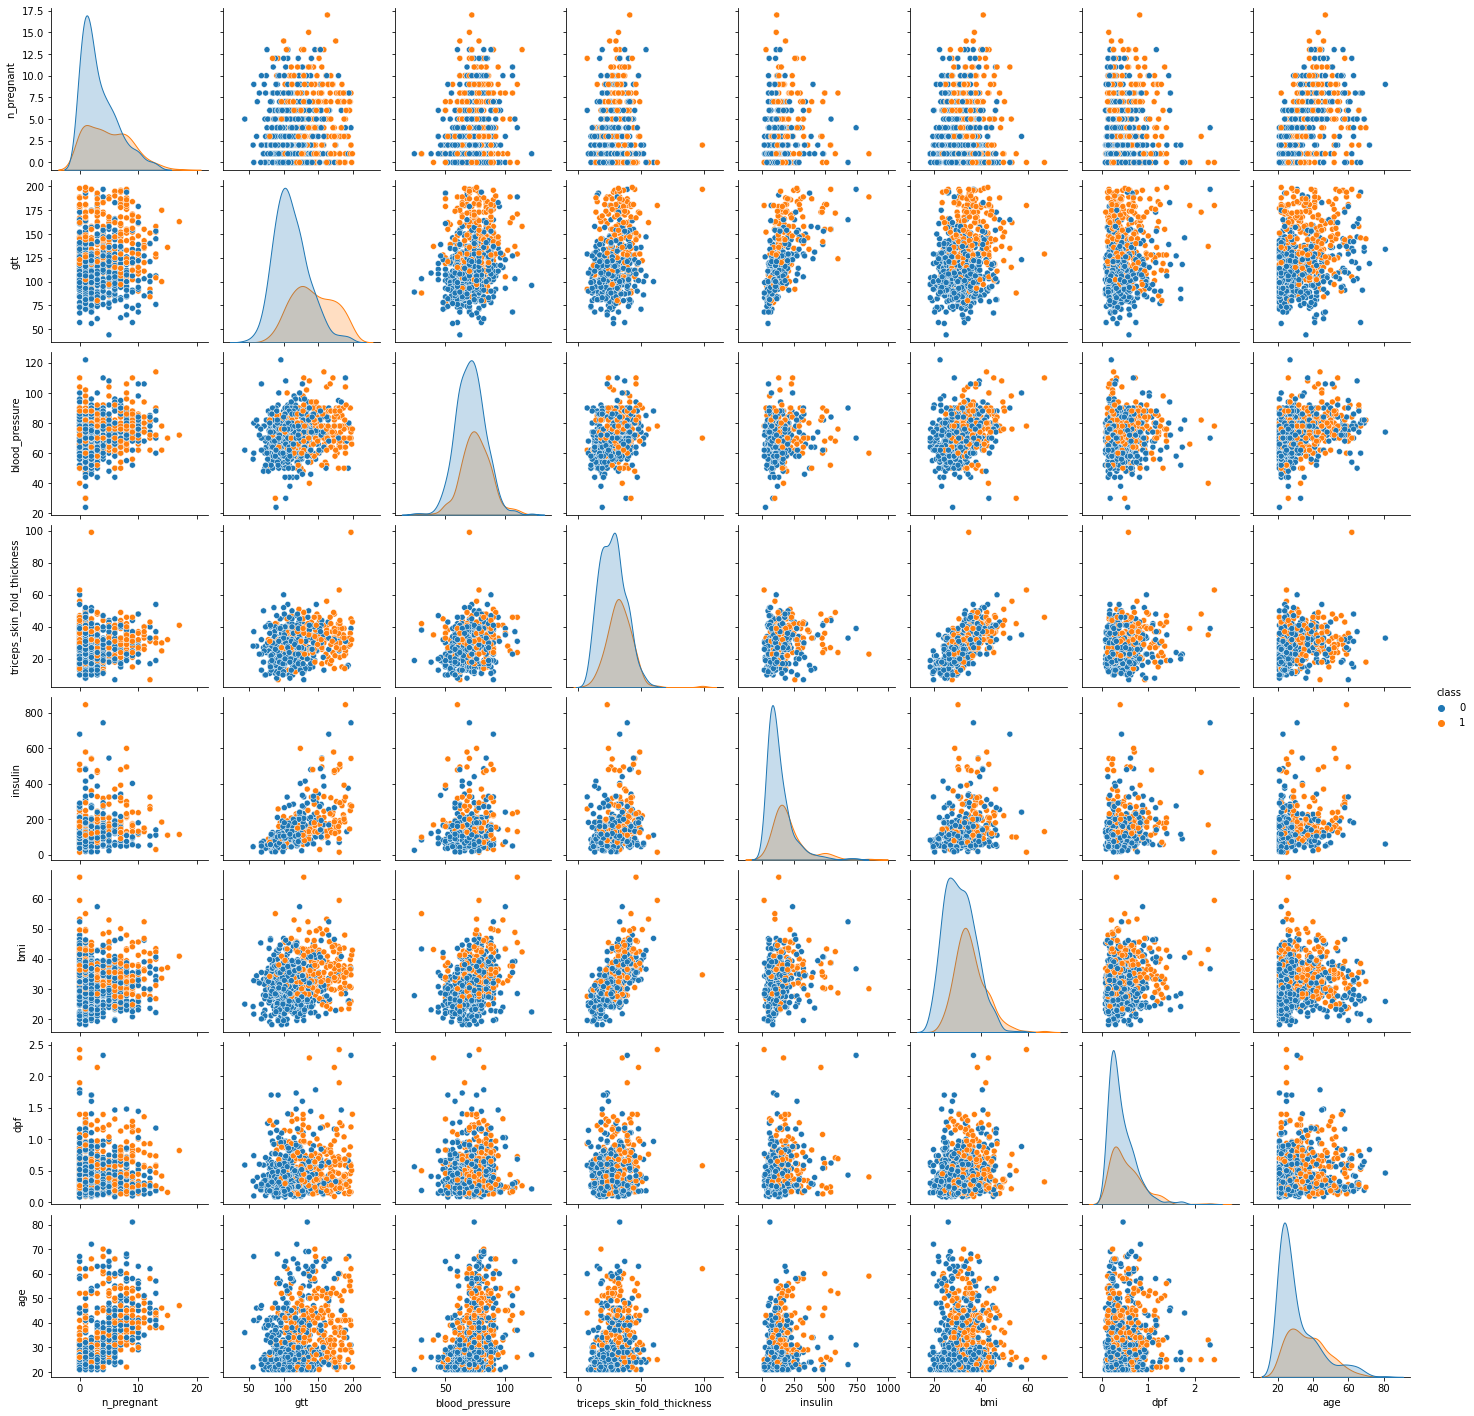

In [55]:
sns.pairplot(df_clean, hue="class", size=2.5)

In [56]:
df_clean.corr(method ='pearson')

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
n_pregnant,1.000000,0.127510,0.214267,0.099545,0.082171,0.021585,-0.033927,0.544018,0.221087
gtt,0.127510,1.000000,0.223345,0.227359,0.581186,0.232700,0.136805,0.266009,0.493950
blood_pressure,0.214267,0.223345,1.000000,0.226859,0.098272,0.289243,-0.002785,0.330618,0.170874
triceps_skin_fold_thickness,0.099545,0.227359,0.226859,1.000000,0.184888,0.648300,0.114698,0.165539,0.258582
insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
bmi,0.021585,0.232700,0.289243,0.648300,0.228050,1.000000,0.155305,0.025564,0.313773
dpf,-0.033927,0.136805,-0.002785,0.114698,0.130395,0.155305,1.000000,0.032738,0.173245
age,0.544018,0.266009,0.330618,0.165539,0.220261,0.025564,0.032738,1.000000,0.236417
class,0.221087,0.493950,0.170874,0.258582,0.303454,0.313773,0.173245,0.236417,1.000000


In [57]:
def corr_overview(df: pd.DataFrame, method_corr = 'pearson'):
    """Returns a correlation FacetGrid plot and a Dataframe with FacetGrid correlation coeffizient, select method_corr: person, spearman."""
    sns.pairplot(df, hue="class", size=2.5)
    df_corr = df.corr(method = method_corr)
    return plt.show(), df_corr

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


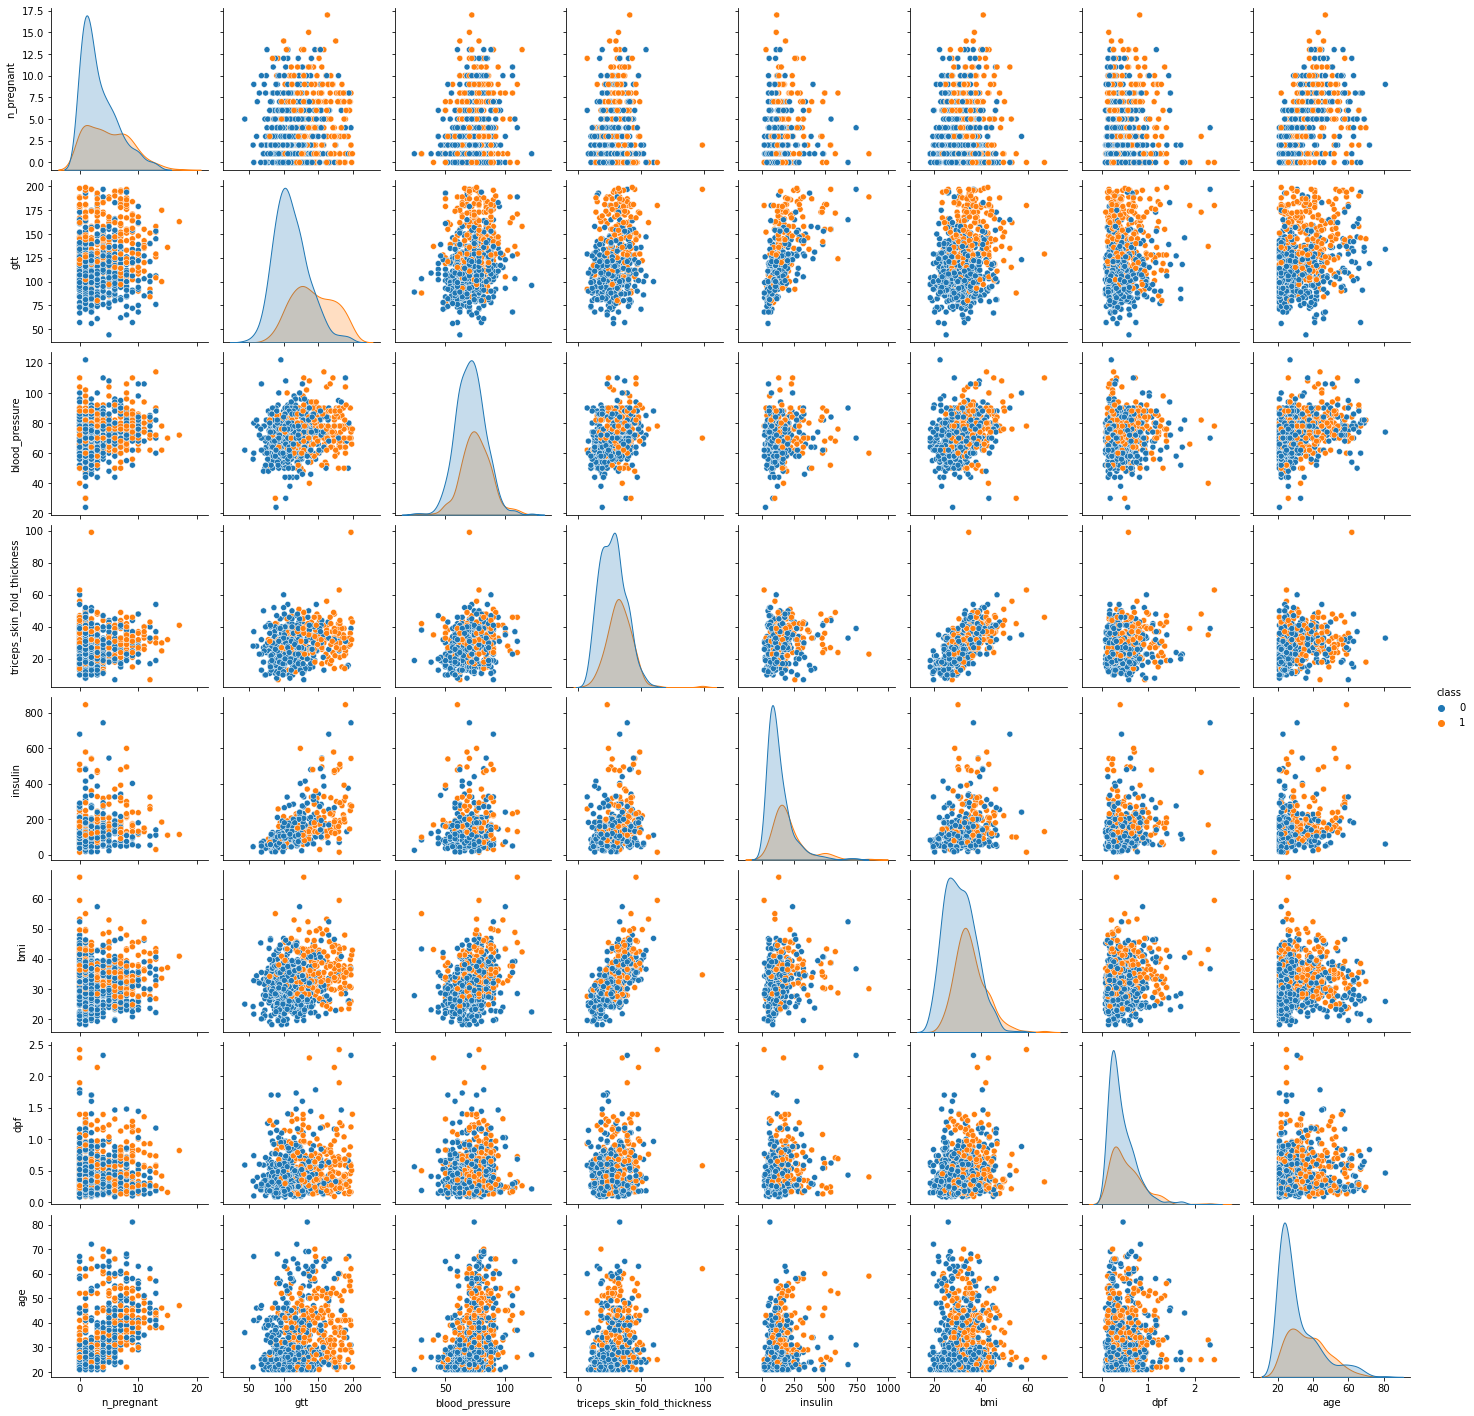

(None,
                              n_pregnant       gtt  blood_pressure  \
 n_pregnant                     1.000000  0.127510        0.214267   
 gtt                            0.127510  1.000000        0.223345   
 blood_pressure                 0.214267  0.223345        1.000000   
 triceps_skin_fold_thickness    0.099545  0.227359        0.226859   
 insulin                        0.082171  0.581186        0.098272   
 bmi                            0.021585  0.232700        0.289243   
 dpf                           -0.033927  0.136805       -0.002785   
 age                            0.544018  0.266009        0.330618   
 class                          0.221087  0.493950        0.170874   
 
                              triceps_skin_fold_thickness   insulin       bmi  \
 n_pregnant                                      0.099545  0.082171  0.021585   
 gtt                                             0.227359  0.581186  0.232700   
 blood_pressure                                 

In [58]:
corr_overview(df_clean)

# Correlation Missing values and all other variables

In [59]:
dict_missing_rows = {}
for i in list(dict_missing.keys()):
    dict_missing_rows[i] = dict_missing[i]["0"] + dict_missing[i]["1"]

In [60]:
df_missing_rows = df[df["bmi"] == 0]
df_missing_rows.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_interpretation,gtt_interpretation
8,8,125,96,0,0,0.0,0.232,54,1,underweight,diabetes mellitus
48,7,105,0,0,0,0.0,0.305,24,0,underweight,diabetes mellitus
59,2,84,0,0,0,0.0,0.304,21,0,underweight,diabetes mellitus
80,2,74,0,0,0,0.0,0.102,22,0,underweight,diabetes mellitus
144,0,102,75,23,0,0.0,0.572,21,0,underweight,diabetes mellitus


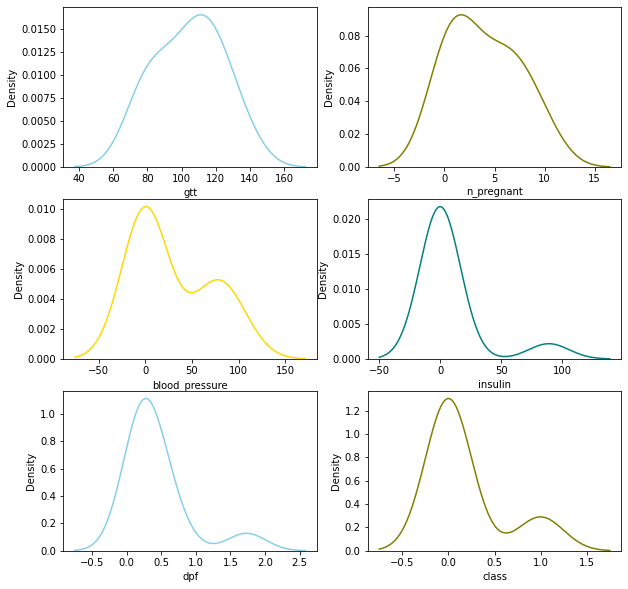

In [61]:
#Plot multiple histplots side by side

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.kdeplot(data=df_missing_rows, x="gtt", color="skyblue", ax=axs[0, 0], label="gtt")
sns.kdeplot(data=df_missing_rows, x="n_pregnant", color="olive", ax=axs[0, 1], label="n_pregnant")
sns.kdeplot(data=df_missing_rows, x="blood_pressure", color="gold", ax=axs[1, 0], label="blood_pressure")
sns.kdeplot(data=df_missing_rows, x="insulin", color="teal", ax=axs[1, 1], label="insulin")
sns.kdeplot(data=df_missing_rows, x="dpf", color="skyblue", ax=axs[2, 0], label="dpf")
sns.kdeplot(data=df_missing_rows, x="class", color="olive", ax=axs[2,1], label="class")

plt.show()

# Hängen die Fehlenden Werte mit der Variabel class zusammen

In [62]:
df["amount_of_na_rows"] = 0

for i in range(len(df)):
    if df["bmi"][i] == 0:
         df["amount_of_na_rows"][i] += 1
    if df["gtt"][i] == 0:
        df["amount_of_na_rows"][i] += 1
    if df["blood_pressure"][i] == 0:
        df["amount_of_na_rows"][i] += 1
    if df["triceps_skin_fold_thickness"][i] == 0:
        df["amount_of_na_rows"][i] += 1
    if df["insulin"][i] == 0:
        df["amount_of_na_rows"][i] += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1946093076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount_of_na_rows"][i] += 1
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1946093076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount_of_na_rows"][i] += 1
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1946093076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [63]:
df["amount_of_na_rows"].describe()

count    767.000000
mean       0.848761
std        0.988482
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: amount_of_na_rows, dtype: float64

In [64]:
df_amount_na = df[df["amount_of_na_rows"] > 1]

In [65]:
amount_of_na_one = df_amount_na[df_amount_na["class"] == 1].sum()
amount_of_na_zero = df_amount_na[df_amount_na["class"] == 0].sum()

In [66]:
#More than one missing value in a row
print(f'0: {amount_of_na_zero["amount_of_na_rows"]}, 1: {amount_of_na_one["amount_of_na_rows"]}')

0: 311, 1: 199


In [67]:
df_na = df[df["amount_of_na_rows"]>0]

In [68]:
amount_na_one = df_na[df_na["class"] == 1].sum()
amount_na_zero = df_na[df_na["class"] == 0].sum()

In [69]:
print(f'0: {amount_na_zero["amount_of_na_rows"]}, 1: {amount_na_one["amount_of_na_rows"]}')

0: 406, 1: 245


In [70]:
dict_missing = {"bmi": {"1": [], "0": []}, "gtt": [], "blood_preasure": [], "triceps": [], "insulin": []}
dict_missing["bmi"]["1"].append(1)
print(dict_missing["bmi"]["1"])

[1]


In [71]:
dict_missing = {"bmi": {"1": [], "0": []}, "gtt": {"1": [], "0": []}, "blood_preasure": {"1": [], "0": []}, "triceps": {"1": [], "0": []}, "insulin": {"1": [], "0": []}}
for i in range(len(df_na)):
    if df["bmi"][i] == 0 and df["class"][i] == 1:
         dict_missing["bmi"]["1"].append(i)
    else:
        dict_missing["bmi"]["0"].append(i)
    if df["gtt"][i] == 0 and df["class"][i] == 1:
        dict_missing["gtt"]["1"].append(i)
    else:
        dict_missing["gtt"]["0"].append(i)
    if df["blood_pressure"][i] == 0 and df["class"][i] == 1:
        dict_missing["blood_preasure"]["1"].append(i)
    else:
        dict_missing["blood_preasure"]["0"].append(i)
    if df["triceps_skin_fold_thickness"][i] == 0 and df["class"][i] == 1:
        dict_missing["triceps"]["1"].append(i)
    else:
        dict_missing["triceps"]["0"].append(i)
    if df["insulin"][i] == 0 and df["class"][i] == 1:
        dict_missing["insulin"]["1"].append(i)
    else:
        dict_missing["insulin"]["0"].append(i)

In [72]:
all_ones = 0
all_zeros = 0

for i in dict_missing.keys():
    print(f'{i} class(0): {len(dict_missing[i]["1"])/(len(dict_missing[i]["1"]) + len(dict_missing[i]["0"]))}')
    all_ones += len(dict_missing[i]["1"])
    print(f'{i} class(1): {len(dict_missing[i]["0"])/(len(dict_missing[i]["1"])+len(dict_missing[i]["0"]))}')
    all_zeros += len(dict_missing[i]["0"])

bmi class(0): 0.0026666666666666666
bmi class(1): 0.9973333333333333
gtt class(0): 0.0026666666666666666
gtt class(1): 0.9973333333333333
blood_preasure class(0): 0.024
blood_preasure class(1): 0.976
triceps class(0): 0.13066666666666665
triceps class(1): 0.8693333333333333
insulin class(0): 0.18933333333333333
insulin class(1): 0.8106666666666666


In [73]:
print(all_ones+all_zeros)

1875


# Anzahl zu entfernende Teilen wenn alle Zeilen mit NAN entfernt werden

In [74]:
len(df_na)

375

# Daten imputieren

Ich würde für das imputieren den Median verwenden, da dieser stabiler ist als der Mittelwert und man bei den Boxplots sehen kann, dass es doch viele Ausreisser hat, welche den Mittelwert stärker beeinflussen

In [75]:
#Replace all missing values with median
df_imput = df_clean.fillna(df_clean.median())

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1070903955.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imput = df_clean.fillna(df_clean.median())


In [76]:
df_imput

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_interpretation,gtt_interpretation
0,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,overweight,diabetes mellitus
1,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,normal,diabetes mellitus
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,overweight,diabetes mellitus
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,obese,diabetes mellitus
4,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,overweight,diabetes mellitus
...,...,...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,obese,diabetes mellitus
763,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,obese,diabetes mellitus
764,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,overweight,diabetes mellitus
765,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,obese,diabetes mellitus


In [77]:
#To use the kniiimputer all variables must be stored as an integer so change all categorial variables to numbers
df_na.bmi_interpretation = pd.Categorical(df_na.bmi_interpretation, categories=["underweight", "normal", "overweight"], ordered=True)
df_na.gtt_interpretation = pd.Categorical(df_na.gtt_interpretation, categories=["normal", "abnormal", "diabetes mellitus"], ordered=True)
df_na.bmi_interpretation = df_na.bmi_interpretation.cat.codes
df_na.gtt_interpretation = df_na.gtt_interpretation.cat.codes

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [78]:
df_na

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_interpretation,gtt_interpretation,amount_of_na_rows
0,1,85,66,29,0,26.6,0.351,31,0,2,2,1
1,8,183,64,0,0,23.3,0.672,32,1,1,2,2
4,5,116,74,0,0,25.6,0.201,30,0,2,2,2
6,10,115,0,0,0,35.3,0.134,29,0,-1,2,3
8,8,125,96,0,0,0.0,0.232,54,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
760,9,170,74,31,0,44.0,0.403,43,1,-1,2,1
761,9,89,62,0,0,22.5,0.142,33,0,1,2,2
763,2,122,70,27,0,36.8,0.340,27,0,-1,2,1
765,1,126,60,0,0,30.1,0.349,47,1,-1,2,2


In [79]:
#Imput NaN with KNNImputer
knni_imputer = KNNImputer(n_neighbors=10)
df_imput_sklearn = pd.DataFrame(knni_imputer.fit_transform(df_na), columns = df_na.columns)

In [80]:
df_imput_sklearn = pd.DataFrame(df_imput_sklearn)
df_imput_sklearn

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_interpretation,gtt_interpretation,amount_of_na_rows
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,2.0,2.0,1.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,1.0,2.0,2.0
2,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,2.0,2.0,2.0
3,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0,-1.0,2.0,3.0
4,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1.0,-1.0,2.0,1.0
371,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0,1.0,2.0,2.0
372,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,-1.0,2.0,1.0
373,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,-1.0,2.0,2.0


In [81]:
df_imput_sklearn.isna().sum()

n_pregnant                     0
gtt                            0
blood_pressure                 0
triceps_skin_fold_thickness    0
insulin                        0
bmi                            0
dpf                            0
age                            0
class                          0
bmi_interpretation             0
gtt_interpretation             0
amount_of_na_rows              0
dtype: int64

In [82]:
df_imput_sklearn.gtt_interpretation

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
370    2.0
371    2.0
372    2.0
373    2.0
374    2.0
Name: gtt_interpretation, Length: 375, dtype: float64

# Mittleres Diabetesrisiko nach n Schwangerschaften

In [83]:
dict_pregnant = {0:{0:0, 1:0}, 1:{0:0, 1:0}, 2:{0:0, 1:0}, 3:{0:0, 1:0}, 4:{0:0, 1:0}, 5:{0:0, 1:0}, 6:{0:0, 1:0}, 7:{0:0, 1:0}, 8:{0:0, 1:0}, 9:{0:0, 1:0}, 10:{0:0, 1:0}, 11:{0:0, 1:0}, 12:{0:0, 1:0}, 13:{0:0, 1:0}, 14:{0:0, 1:0}, 15:{0:0, 1:0}, 16:{0:0, 1:0}, 17:{0:0, 1:0}}
for i in range(len(df)):
    dict_pregnant[df["n_pregnant"][i]][df["class"][i]] += 1

In [84]:
df_risk = pd.DataFrame(dict_pregnant)

In [85]:
df_risk = df_risk.transpose()

In [86]:
df_risk.index.rename("age")

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64', name='age')

In [87]:
df_risk["risk"] = 0
df_risk["age"] = 0
df_risk["std"] = 0.0
for i in range(len(df_risk)):
    df_risk["risk"] = df_risk[1]/(df_risk[0]+df_risk[1])
    df_risk["age"][i] = i
    df_risk["std"][i] = float(np.sqrt(((df_risk[1][i]-(267/17))**2)/17)/100)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1914104037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risk["age"][i] = i
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1914104037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_risk["std"][i] = float(np.sqrt(((df_risk[1][i]-(267/17))**2)/17)/100)


In [88]:
df_risk

,0,1,risk,age,std
0,73,38,0.342342,0,0.054071
1,106,29,0.214815,1,0.032243
2,84,19,0.184466,2,0.007989
3,48,27,0.360000,3,0.027392
4,45,23,0.338235,4,0.017691
5,36,21,0.368421,5,0.012840
6,34,15,0.306122,6,0.001712
7,20,25,0.555556,7,0.022542
8,16,22,0.578947,8,0.015265
9,10,18,0.642857,9,0.005564


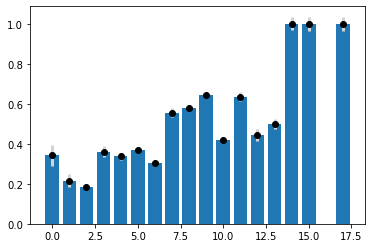

In [89]:
plt.bar(df_risk["age"], df_risk["risk"])
plt.errorbar(data=df_risk, x="age", y="risk", yerr="std", fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

# Wie stark kann man dem dpf trauen?

<AxesSubplot:xlabel='dpf', ylabel='Density'>

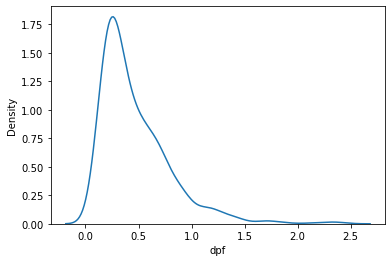

In [90]:
sns.kdeplot(df.dpf)

<AxesSubplot:xlabel='dpf', ylabel='Count'>

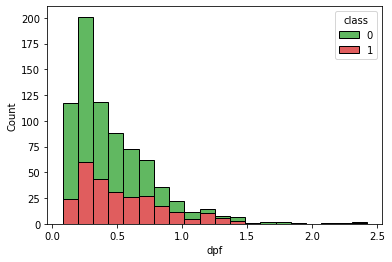

In [159]:
sns.histplot(data=df_imput, x="dpf", hue="class", bins=20, palette=["C2", "C3"], multiple="stack")

# Wie wirkt sich das Alter aus?

In [92]:
df_diab_age = df_imput_sklearn[df_imput_sklearn["age"]>= 20]

In [93]:
min(df_diab_age.age)

21.0

In [94]:
df_diab_age["class"] = df_diab_age["class"].astype(int)

In [95]:
df_diab_age

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_interpretation,gtt_interpretation,amount_of_na_rows
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,2.0,2.0,1.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,1.0,2.0,2.0
2,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0,2.0,2.0,2.0
3,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0,-1.0,2.0,3.0
4,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1,-1.0,2.0,1.0
371,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0,1.0,2.0,2.0
372,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0,-1.0,2.0,1.0
373,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1,-1.0,2.0,2.0


In [96]:
max(df_diab_age.age)

72.0

In [97]:
#group df by age
df_diab_age = df_diab_age.groupby((df_diab_age.age//10), as_index=False).agg({"age":"mean","n_pregnant":"count", "class":"sum"})

In [98]:
df_diab_age = df_diab_age.rename(columns={"n_pregnant" : "Amount_of_people"})

In [99]:
df_diab_age

,age,Amount_of_people,class
0,24.398734,158,36
1,34.298851,87,41
2,43.333333,72,39
3,53.903226,31,13
4,64.320000,25,7
5,71.000000,2,1


In [100]:
df_diab_age["age"] = ["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]

In [101]:
df_diab_age

,age,Amount_of_people,class
0,20-30,158,36
1,30-40,87,41
2,40-50,72,39
3,50-60,31,13
4,60-70,25,7
5,70-80,2,1


In [102]:
df_diab_age["prob_of_diab"] = 0.0
df_diab_age["std"] = 0.0
for i in range(len(df_diab_age)):
    df_diab_age["prob_of_diab"][i] = float((df_diab_age["class"][i]/df_diab_age["Amount_of_people"][i]))
    df_diab_age["std"][i] = float(np.sqrt(((df_diab_age["class"][i]-(137/5))**2)/5)/100)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/945688973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diab_age["prob_of_diab"][i] = float((df_diab_age["class"][i]/df_diab_age["Amount_of_people"][i]))
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/945688973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diab_age["std"][i] = float(np.sqrt(((df_diab_age["class"][i]-(137/5))**2)/5)/100)


In [103]:
df_diab_age

,age,Amount_of_people,class,prob_of_diab,std
0,20-30,158,36,0.227848,0.038460
1,30-40,87,41,0.471264,0.060821
2,40-50,72,39,0.541667,0.051877
3,50-60,31,13,0.419355,0.064399
4,60-70,25,7,0.280000,0.091232
5,70-80,2,1,0.500000,0.118064


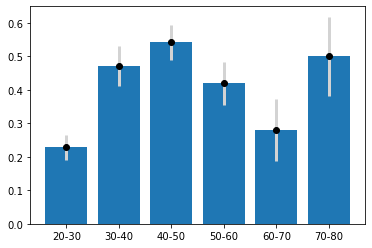

In [104]:
plt.bar(df_diab_age["age"], df_diab_age["prob_of_diab"])
plt.errorbar(data=df_diab_age, x="age", y="prob_of_diab", yerr="std", fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

# Diabetesrisiko nach BMI

In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   n_pregnant                   767 non-null    int64  
 1   gtt                          762 non-null    float64
 2   blood_pressure               732 non-null    float64
 3   triceps_skin_fold_thickness  540 non-null    float64
 4   insulin                      394 non-null    float64
 5   bmi                          756 non-null    float64
 6   dpf                          767 non-null    float64
 7   age                          767 non-null    int64  
 8   class                        767 non-null    int64  
 9   bmi_interpretation           767 non-null    object 
 10  gtt_interpretation           767 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 66.0+ KB


In [132]:
df_clean["bmi_interpretation"] = pd.Categorical(df_clean.bmi_interpretation, categories=["underweight", "normal", "overweight", "obese"], ordered=True)
df_clean["gtt_interpretation"] = pd.Categorical(df_clean.gtt_interpretation, categories=["normal", "abnormal", "diabetes mellitus"], ordered=True)

In [133]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   n_pregnant                   767 non-null    int64   
 1   gtt                          762 non-null    float64 
 2   blood_pressure               732 non-null    float64 
 3   triceps_skin_fold_thickness  540 non-null    float64 
 4   insulin                      394 non-null    float64 
 5   bmi                          756 non-null    float64 
 6   dpf                          767 non-null    float64 
 7   age                          767 non-null    int64   
 8   class                        767 non-null    int64   
 9   bmi_interpretation           767 non-null    category
 10  gtt_interpretation           767 non-null    category
dtypes: category(2), float64(6), int64(3)
memory usage: 55.9 KB


In [134]:
df_bmi_group = df_clean.groupby('bmi_interpretation', as_index=False).agg({"age":"mean", "bmi":"mean", "class":"sum", "gtt":"count"})

In [135]:
df_bmi_group = df_bmi_group.rename(columns={"gtt": "Amount"})

In [136]:
df_bmi_group["prob_of_diab"] = 0.0
df_bmi_group["std"] = 0.0
df_bmi_group["bmi"] = ["18.5-25",">=30","25-30","<18.5"]
for i in range(len(df_bmi_group)):
    df_bmi_group["prob_of_diab"][i] = float(df_bmi_group["class"][i]/sum(df_bmi_group["class"]))
    df_bmi_group["std"][i] = float(np.sqrt(((df_diab_age["class"][i]-(sum(df_diab_age["class"])/len(df_diab_age)))**2)/len(df_bmi_group))/100)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1174523460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_group["prob_of_diab"][i] = float(df_bmi_group["class"][i]/sum(df_bmi_group["class"]))
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1303/1174523460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_group["std"][i] = float(np.sqrt(((df_diab_age["class"][i]-(sum(df_diab_age["class"])/len(df_diab_age)))**2)/len(df_bmi_group))/100)


In [137]:
df_bmi_group

,bmi_interpretation,age,bmi,class,Amount,prob_of_diab,std
0,underweight,28.733333,18.5-25,2,15,0.007491,0.065833
1,normal,31.892157,>=30,7,101,0.026217,0.090833
2,overweight,32.882682,25-30,40,178,0.149813,0.080833
3,obese,33.777070,<18.5,218,468,0.816479,0.049167


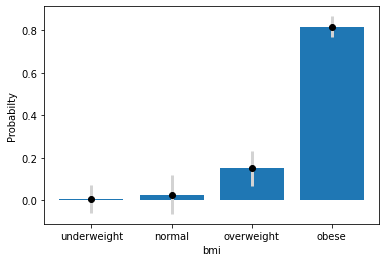

In [138]:
plt.bar(df_bmi_group["bmi_interpretation"], df_bmi_group["prob_of_diab"])
plt.errorbar(data=df_bmi_group, x="bmi_interpretation", y="prob_of_diab", yerr="std", fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xlabel("bmi")
plt.ylabel("Probabilty")
plt.show()

# Einfluss des Bluthochdruck auf Diabetes

<AxesSubplot:xlabel='blood_pressure', ylabel='Count'>

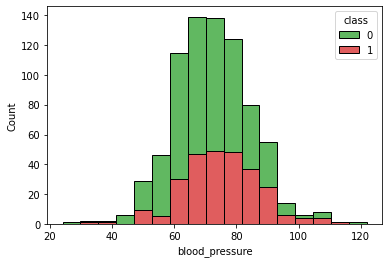

In [156]:
sns.histplot(data=df_imput, x="blood_pressure", hue="class", bins=17, palette=["C2", "C3"], multiple="stack")